# Compare with Jeremy

- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : June 5th 2023
- last update : June 5th 2023

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline
import pickle
import seaborn as sns
import copy
from collections import OrderedDict

import re


In [2]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [3]:
import time
from datetime import datetime,date
from astropy.time import Time
import dateutil.parser
import pytz

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

# Jeremy

In [5]:
file_jeremy ="data/jeremy/auxtel_libradtran.npy"

In [6]:
#t = Table.read(file_jeremy)
data = np.load(file_jeremy,allow_pickle=True)

In [7]:
dfj = pd.DataFrame(data)

In [8]:
dfj

,DATE-OBS,id,BITPIX,NAXIS,NAXIS1,NAXIS2,EXTEND,TARGET,REDSHIFT,GRATING,...,PWV [mm]_y,PWV [mm]_err_y,reso [pix],reso [pix]_err,D_CCD [mm]_y,D_CCD [mm]_err_y,alpha_pix [pix],alpha_pix [pix]_err,B_y,B_err_y
0,2022-09-28 05:17:00.004501045+00:00,2022092700534,-64,2,1137,3,True,HD42525,0.000059,holo4_003,...,5.021849,0.089304,1.009729,0.035534,187.662036,0.005874,-0.711086,0.0,0.0,0.0
1,2022-09-28 05:17:42.818994862+00:00,2022092700535,-64,2,1136,3,True,HD42525,0.000059,holo4_003,...,5.024311,0.089544,1.082242,0.035182,187.678413,0.005897,-0.880947,0.0,0.0,0.0
2,2022-09-28 05:24:46.622992156+00:00,2022092700546,-64,2,1137,3,True,HD185975,-0.000065,holo4_003,...,5.171031,0.084584,1.987504,0.058614,187.370756,0.010531,-0.013693,0.0,0.0,0.0
3,2022-09-28 05:25:29.532001588+00:00,2022092700547,-64,2,1136,3,True,HD185975,-0.000065,holo4_003,...,4.993147,0.090185,1.186229,0.039636,187.289237,0.007388,0.121816,0.0,0.0,0.0
4,2022-09-28 05:32:08.277495328+00:00,2022092700557,-64,2,1137,3,True,HD42525,0.000059,holo4_003,...,5.031474,0.089709,1.116816,0.031166,187.814090,0.005986,-1.023332,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2938,2023-05-12 00:53:58.869992498+00:00,2023051100245,-64,2,1136,3,True,HD185975,-0.000065,holo4_003,...,5.047196,0.083596,1.032902,0.036137,187.314204,0.006658,0.038416,0.0,0.0,0.0
2939,2023-05-12 00:56:15.004507535+00:00,2023051100248,-64,2,1136,3,True,HD185975,-0.000065,holo4_003,...,5.576665,0.085201,1.384699,0.041229,187.402549,0.005930,0.040772,0.0,0.0,0.0
2940,2023-05-12 00:59:15.394492061+00:00,2023051100252,-64,2,1137,3,True,HD185975,-0.000065,holo4_003,...,6.430016,0.085678,1.388429,0.041664,187.324178,0.007261,0.054135,0.0,0.0,0.0
2941,2023-05-12 01:03:30.314509927+00:00,2023051100257,-64,2,1137,3,True,HD185975,-0.000065,holo4_003,...,5.287981,0.083523,1.268439,0.037134,187.383944,0.006984,0.051462,0.0,0.0,0.0


In [22]:
all_datetime_j = [ Time(str_time).to_datetime() for str_time in dfj['DATE-OBS'] ]
pwv_j = dfj["PWV [mm]_y"]
epwv_j = dfj["PWV [mm]_err_y"]

In [39]:
len(dfj)

2943

# my Data

In [9]:
DATE="2022 - 2023"
FLAG_SELECT_POLAR = True
FLAG_SELECT_REMOVE_BIGSIGMA = True

In [10]:
if FLAG_SELECT_POLAR:
    tag_stars = "HD185975_star"
else:
    tag_stars = "all_stars"

In [11]:
path_out = "dataout/fitparamatm"

In [12]:
filenames = [ 
"multifitcovparamatm-2022-09-27-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-09-28-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-09-29-empty~holo4_003-psf2dffm-polar.csv",
#"multifitcovparamatm-2022-10-12-empty~holo4_003-psf2dffm-polar.csv",
#"multifitcovparamatm-2022-10-26-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-10-27-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-11-09-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-11-10-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-11-23-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-12-08-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-12-09-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-01-17-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-01-18-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-02-14-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-02-15-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-02-16-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-02-28-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-03-01-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-03-02-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-03-15-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-03-16-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-05-09-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-05-10-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-05-11-empty~holo4_003-psf2dffm-polar.csv"]

In [13]:
NDAYS = len(filenames)
tags = [ ]
for fn in filenames:
    the_date_tag = re.findall("^multifitcovparamatm-(.*)-empty~holo4_003-psf2dffm-polar.csv$",fn)[0]
    tags.append(the_date_tag)

In [14]:
all_dfs = []
for filename in filenames:
    df = pd.read_csv(os.path.join(path_out,filename), index_col=0)
    df=df.dropna(axis=0)
    
    #cut on chi2
    df = df[df['chi2_1']<400]
    
    if FLAG_SELECT_POLAR:
        df = df[df["spec_target_label"]=='HD185975']
        
    if FLAG_SELECT_REMOVE_BIGSIGMA:
        df =df[df["pwv_sig"]<1]
    all_dfs.append(df)

In [15]:
dfs = pd.concat(all_dfs)

In [16]:
dfs

,index,exposure,spec_date_obs,spec_target_label,spec_filter_label,spec_airmass,spec_pressure,spec_temperature,spec_humidity,spec_hour_angle,...,egrey_3,SNR_3,chi2_4,pwv_4,grey_4,epwv_4,egrey_4,SNR_4,pwv_avg,pwv_sig
4,27,2022092700734,2022-09-28T08:44:30.712000547Z,HD185975,empty,2.052135,0,0,0,-239.381469,...,0.001214,0.070459,3.429068,7.198238,0.642188,0.288268,0.001155,0.037200,6.366714,0.696058
5,28,2022092700735,2022-09-28T08:45:13.622001236Z,HD185975,empty,2.052582,0,0,0,-239.202314,...,0.002100,0.011859,5.505423,7.121764,0.988605,0.296650,0.001840,0.072462,6.234264,0.667250
0,0,2022092800358,2022-09-29T02:07:48.026501837Z,HD185975,empty,1.844346,0,0,0,-339.105629,...,0.002039,0.064295,7.841671,7.454947,1.022783,0.267768,0.001601,0.008143,6.021424,0.985342
2,20,2022092800469,2022-09-29T03:24:22.341002192Z,HD185975,empty,1.865924,0,0,0,-319.739723,...,0.002473,0.077616,14.283400,7.019726,1.025409,0.346493,0.002080,0.041179,5.395456,0.902924
3,21,2022092800470,2022-09-29T03:25:05.327496966Z,HD185975,empty,1.866183,0,0,0,-319.556360,...,0.002365,0.025491,16.887534,6.707261,1.013475,0.367649,0.002237,0.024022,5.331986,0.820345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,20,2023051100233,2023-05-12T00:44:31.382492410Z,HD185975,empty,2.103332,0,0,0,-136.717421,...,0.001635,0.066612,4.088804,7.262500,1.010128,0.211648,0.001363,0.045800,6.009896,0.735803
11,21,2023051100236,2023-05-12T00:46:44.261508838Z,HD185975,empty,2.101509,0,0,0,-135.994466,...,0.003229,0.088654,22.301741,6.175447,1.012504,0.458125,0.003073,0.145644,5.510697,0.659891
13,23,2023051100245,2023-05-12T00:53:58.869992498Z,HD185975,empty,2.098629,0,0,0,-134.384948,...,0.001464,0.082176,3.963201,7.633003,1.015319,0.225693,0.001424,0.050955,6.103059,0.901676
16,26,2023051100257,2023-05-12T01:03:30.314509927Z,HD185975,empty,2.093680,0,0,0,-132.033461,...,0.002083,0.009151,6.671683,7.249855,1.024393,0.263372,0.001698,0.001724,6.043907,0.654620


In [23]:
all_datetime_s = [ Time(str_time).to_datetime() for str_time in dfs['spec_date_obs'] ]
pwv_s = dfs["pwv_1"]
epwv_s = dfs["epwv_1"]

In [24]:
# Create rectangle x coordinates
startTime = all_datetime_s[0]
endTime =  all_datetime_s[-1]

# convert to matplotlib date representation
start = mdates.date2num(startTime)
end = mdates.date2num(endTime)
width = end - start


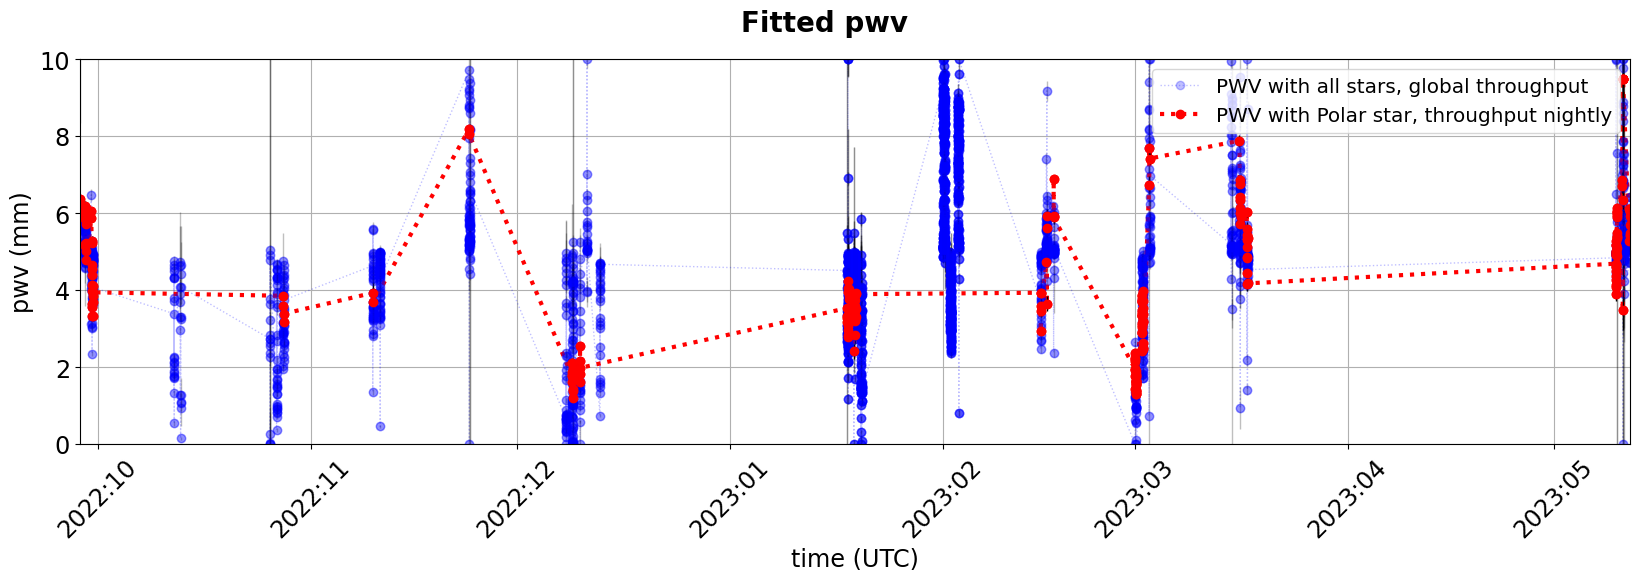

In [30]:
fig=plt.figure(figsize=(20,5))
gs = gridspec.GridSpec(1, 1,width_ratios=[1],figure=fig)
    
ax= fig.add_subplot(gs[0,0])
myFmt = mdates.DateFormatter('%Y:%m')
ax.xaxis.set_major_formatter(myFmt)
  
  

ax.plot(all_datetime_j,pwv_j,':o',color='b',lw=1,label="PWV with all stars, global throughput",alpha=0.25)
ax.errorbar(all_datetime_j,pwv_j,yerr=epwv_j,fmt='o',color='b',ecolor="k",lw=1,alpha=0.25)
    
ax.plot(all_datetime_s,pwv_s,':o',color='r',lw=3,label="PWV with Polar star, throughput nightly")
ax.errorbar(all_datetime_s,pwv_s,yerr=epwv_s,fmt='o',color='r',ecolor="k",lw=1,alpha=1)
       
    

ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel("time (UTC)")
ax.set_ylabel("pwv (mm)")
#ax.set_ylim(pwv.min()-2*y_shift,pwv.max()+2*y_shift)
ax.set_xlim(start,end)

    
ax.grid()
ax.set_ylim(0.,10.)

ax.legend(loc="upper right")
    
    
if FLAG_SELECT_POLAR:
    the_title = "Fitted pwv "
else:
    the_title = "Fitted pwv with all stars "
plt.suptitle(the_title,fontsize="20",fontweight="bold")
plt.show()
    

#  MERRA2

In [31]:

path_merra2="data/merra2"
files_merra2=["MERRA2_2022_inst1_2d_asm_Nx_M2I1NXASM_lsst_AllYear.csv","MERRA2_2023_inst1_2d_asm_Nx_M2I1NXASM_lsst_AllYear.csv"]

In [32]:
all_merra2 = []
for file in files_merra2:
    merra2 = pd.read_csv(os.path.join(path_merra2,file))
    all_merra2.append(merra2)

In [33]:
merra2 = pd.concat(all_merra2,axis=0)

In [34]:
# datetime list
all_merra2_datetime = [ Time(str_time).to_datetime() for str_time in merra2['time'] ]

# pandas series
pwv_merra2 = merra2['TQV']
oz_merra2 = merra2['TO3']

# merra time series
merra_time_series = pd.to_datetime(all_merra2_datetime)

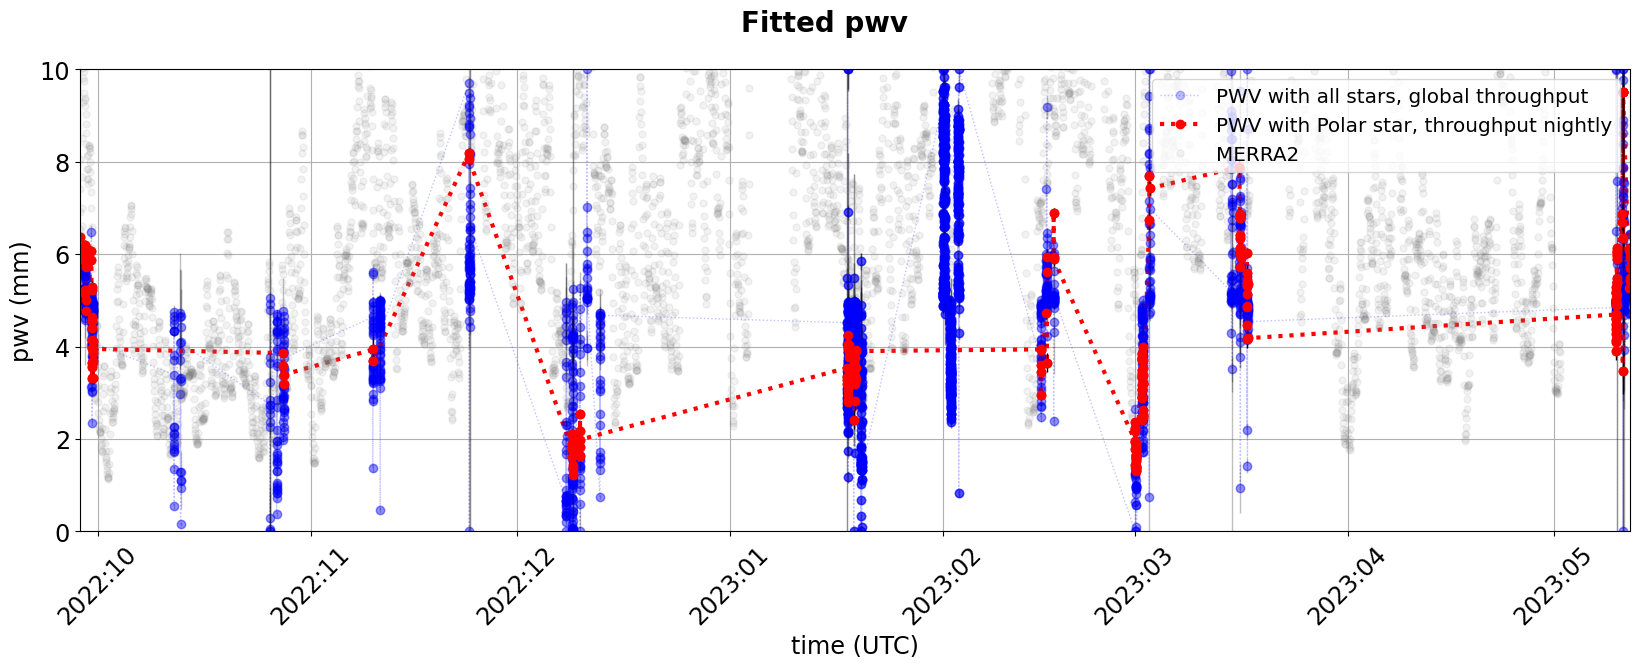

In [38]:
fig=plt.figure(figsize=(20,6))
gs = gridspec.GridSpec(1, 1,width_ratios=[1],figure=fig)
    
ax= fig.add_subplot(gs[0,0])
myFmt = mdates.DateFormatter('%Y:%m')
ax.xaxis.set_major_formatter(myFmt)
  
  

ax.plot(all_datetime_j,pwv_j,':o',color='b',lw=1,label="PWV with all stars, global throughput",alpha=0.25)
ax.errorbar(all_datetime_j,pwv_j,yerr=epwv_j,fmt='o',color='b',ecolor="k",lw=1,alpha=0.25)
    
ax.plot(all_datetime_s,pwv_s,':o',color='r',lw=3,label="PWV with Polar star, throughput nightly")
ax.errorbar(all_datetime_s,pwv_s,yerr=epwv_s,fmt='o',color='r',ecolor="k",lw=1,alpha=1)
       

    
ax.plot(all_merra2_datetime,pwv_merra2 ,'o',color="grey",markersize=5,lw=1,alpha=0.1,label="MERRA2")

        
    

ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel("time (UTC)")
ax.set_ylabel("pwv (mm)")
#ax.set_ylim(pwv.min()-2*y_shift,pwv.max()+2*y_shift)
ax.set_xlim(start,end)

    
ax.grid()
ax.set_ylim(0.,10.)

ax.legend(loc="upper right")
    
    
if FLAG_SELECT_POLAR:
    the_title = "Fitted pwv "
else:
    the_title = "Fitted pwv with all stars "
plt.suptitle(the_title,fontsize="20",fontweight="bold")
plt.show()